In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('treebank')
nltk.download('brown')
nltk.download('conll2000')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [4]:
import re, string
import nltk
#from nltk.corpus import brown
#from nltk.corpus import treebank
#from nltk.corpus import conll2007
from nltk.corpus import stopwords


In [5]:
True_news = pd.read_csv('/gdrive/My Drive/Colab Notebooks/RNN/Real_Fake_news model/True.csv')
Fake_news = pd.read_csv('/gdrive/My Drive/Colab Notebooks/RNN/Real_Fake_news model/Fake.csv')


In [6]:
True_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
Fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
True_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
True_news['news_type'] = 1 #denoting True news by 1'

In [10]:
True_news.tail()

,title,text,subject,date,news_type
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [11]:
Fake_news['news_type'] = 0 #denoting False news by 0'

In [12]:
Fake_news.head()

,title,text,subject,date,news_type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
df = pd.concat([True_news,Fake_news],axis = 0) # combining both data sets
df.head()

,title,text,subject,date,news_type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [14]:
df.tail()

,title,text,subject,date,news_type
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   news_type  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [16]:
df.tail()

,title,text,subject,date,news_type
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [17]:
df['news_type'].value_counts()

0    23481
1    21417
Name: news_type, dtype: int64

Data is balanced

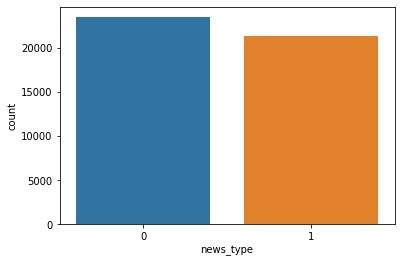

In [18]:
sns.countplot(df['news_type']);

In [19]:

df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

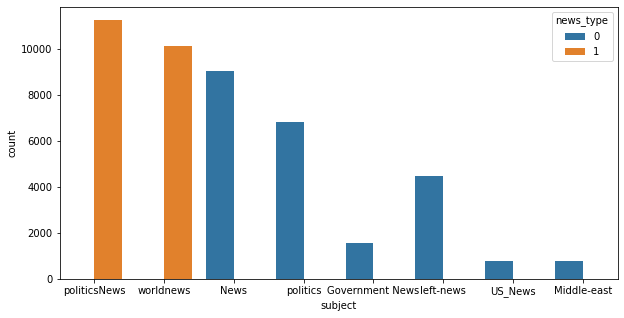

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'subject',hue = 'news_type',data = df)

In [21]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
news_type    0
dtype: int64

In [22]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = stopwords.words('english')

In [24]:
#print stop words
print(len(stopwords.words('english')))
print(stopwords.words('english'))

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [25]:
list(df['text'][0])

['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educa

In [26]:
df.head(1)

,title,text,subject,date,news_type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1


In [27]:
df['news'] = df['title'] + ' ' + df['subject']

In [28]:
#data = dataset.drop(columns='label', axis=1)
df = df.drop(columns=['title','text','subject','date'],index= 1)

In [29]:
df.tail(2)

,news_type,news
23479,0,How to Blow $700 Million: Al Jazeera America F...
23480,0,10 U.S. Navy Sailors Held by Iranian Military ...


In [30]:
text = df.drop(columns = ['news_type'])

In [31]:
#text = df[['news']]

In [32]:
label = df['news_type']

In [33]:
type(label)

pandas.core.series.Series

In [34]:
type(text)

pandas.core.frame.DataFrame

In [35]:
#cleaning text.
#Stemming is a technique used to extract the base form of the words by removing affixes from them.
porter = PorterStemmer()
def clean(text):
    stemmed_text = re.sub('[^a-zA-Z]', ' ',text) # ^ this is for exclusion 
    stemmed_text = stemmed_text.lower()
    stemmed_text = stemmed_text.split()
    
    # porter_stem(word): to reduce the word 
    stemmed_text = [porter.stem(word) for word in stemmed_text if not word in stopwords.words('english')] # this will store words after removing special character exclusing stopwords also
    stemmed_text = ' '.join(stemmed_text)
    return stemmed_text
    

In [36]:
df['news'] = df['news'].apply(clean)

In [37]:
df.head()

,news_type,news
0,1,u budget fight loom republican flip fiscal scr...
2,1,senior u republican senat let mr mueller job p...
3,1,fbi russia probe help australian diplomat tip ...
4,1,trump want postal servic charg much amazon shi...
5,1,white hous congress prepar talk spend immigr p...


In [38]:
#df.to_excel('/gdrive/My Drive/Colab Notebooks/RNN/Real_Fake_news model/df_final.xlsx')


In [39]:
#Split Data into Training and Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['news'],
    df['news_type'],
    test_size=0.3, 
    random_state=42,stratify=df['news_type'])

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31427,), (13469,), (31427,), (13469,))

In [41]:
#Building the Tokenizer
X_train.tolist()[0]

'media tell manchest terror attack video polit'

In [42]:
import tensorflow as tf

In [43]:
top_words = 10000 #Vocablury size
t = tf.keras.preprocessing.text.Tokenizer(num_words=top_words) # num_words -> Vocablury size

In [44]:
#Fit tokenizer with actual training data.Tokelization means identifying all indvisual unique words and creating a dictionary out of it.
t.fit_on_texts(X_train.to_list())

In [45]:
type(t)

keras_preprocessing.text.Tokenizer

In [46]:
#Vocabulary.Here index is assigned against each word of entire review
t.word_index

{'news': 1,
 'trump': 2,
 'politicsnew': 3,
 'worldnew': 4,
 'video': 5,
 'polit': 6,
 'u': 7,
 'left': 8,
 'say': 9,
 'obama': 10,
 'hillari': 11,
 'govern': 12,
 'hous': 13,
 'watch': 14,
 'presid': 15,
 'republican': 16,
 'clinton': 17,
 'new': 18,
 'white': 19,
 'senat': 20,
 'call': 21,
 'democrat': 22,
 'state': 23,
 'us': 24,
 'bill': 25,
 'russia': 26,
 'elect': 27,
 'vote': 28,
 'get': 29,
 'support': 30,
 'break': 31,
 'attack': 32,
 'make': 33,
 'tweet': 34,
 'court': 35,
 'north': 36,
 'plan': 37,
 'black': 38,
 'muslim': 39,
 'korea': 40,
 'report': 41,
 'donald': 42,
 'middl': 43,
 'east': 44,
 'media': 45,
 'show': 46,
 'back': 47,
 'american': 48,
 'want': 49,
 'china': 50,
 'kill': 51,
 'tax': 52,
 'leader': 53,
 'anti': 54,
 'right': 55,
 'polic': 56,
 'gop': 57,
 'meet': 58,
 'campaign': 59,
 'deal': 60,
 'talk': 61,
 'take': 62,
 'may': 63,
 'iran': 64,
 'protest': 65,
 'one': 66,
 'offici': 67,
 'tell': 68,
 'america': 69,
 'year': 70,
 'russian': 71,
 'law': 72,
 

In [47]:
# Prepare Training and Test Data
# Get the word index for each of the word in the review
X_train = t.texts_to_sequences(X_train.tolist())

In [48]:
#ckecking first data after tokenization
X_train[0]

[45, 68, 3807, 193, 32, 5, 6]

In [49]:
# coverting test data to sequence of numbers
X_test = t.texts_to_sequences(X_test.tolist())  

In [50]:
# Pad Sequences
#Define maximum number of words to consider in each review
max_review_length = 100

In [51]:
#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,maxlen = max_review_length, padding= 'pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen = max_review_length, padding= 'pre')

In [52]:
# checking data after padding and counting lenght
print('lenght of sequence :',len(X_train[0]))
X_train[0]

lenght of sequence : 100


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,   45,   68, 3807,  193,   32,    5,
          6], dtype=int32)

In [53]:
X_train.shape

(31427, 100)

In [54]:
type(X_train)

numpy.ndarray

In [55]:
#converting into X_train dataframe
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,45,68,3807,193,32,5,6
1,0,0,0,0,0,0,0,0,0,0,...,465,2,622,9,1372,216,1668,459,177,1
2,0,0,0,0,0,0,0,0,0,0,...,313,2461,100,1265,294,2262,265,5845,12,1
3,0,0,0,0,0,0,0,0,0,0,...,1266,671,160,2197,836,314,39,1595,5,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,267,315,384,3


In [56]:
X_test.shape

(13469, 100)

# Model building

In [57]:
#Initializing the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [58]:
model.add(tf.keras.layers.Embedding(top_words+1,50,input_length = max_review_length,trainable = False))  #Vocablury size = top_words,#Embedding size.every word lengh is of 50 numbers.#Number of words in each review

In [59]:
#adding Batchbormalization and dropouts
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))


In [60]:
#Adding LSTM layer with 128 states as RNN layers
model.add(tf.keras.layers.LSTM(128,dropout = 0.25))

In [61]:
#adding Batchbormalization and dropouts
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

In [62]:
# Adding dense layer for output
model.add(tf.keras.layers.Dense(1, activation= 'sigmoid'))

In [63]:
#Compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics= ['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           500050    
                                                                 
 batch_normalization (BatchN  (None, 100, 50)          200       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
# This callback will stop the training when there is no improvement in the loss for five consecutive epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience=3, mode = 'auto')

In [66]:
#history = model.fit(X_train,y_train,epochs = 10,batch_size = 32,validation_data=(X_test,y_test),callbacks=[early_stopping])
history = model.fit(X_train,y_train,epochs = 6,batch_size = 64,validation_data=(X_test,y_test),validation_split = 0.1)

Epoch 1/6
442/442 [==============================] - 104s 230ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0630 - val_accuracy: 1.0000
Epoch 2/6
442/442 [==============================] - 108s 245ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 1.5797e-06 - val_accuracy: 1.0000
Epoch 3/6
442/442 [==============================] - 99s 224ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 5.5301e-07 - val_accuracy: 1.0000
Epoch 4/6
442/442 [==============================] - 99s 224ms/step - loss: 9.0742e-04 - accuracy: 0.9997 - val_loss: 2.6896e-07 - val_accuracy: 1.0000
Epoch 5/6
442/442 [==============================] - 97s 219ms/step - loss: 6.2763e-04 - accuracy: 0.9998 - val_loss: 1.1121e-07 - val_accuracy: 1.0000
Epoch 6/6
442/442 [==============================] - 97s 219ms/step - loss: 7.6462e-04 - accuracy: 0.9998 - val_loss: 3.6805e-08 - val_accuracy: 1.0000


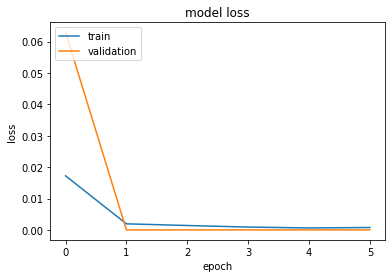

In [67]:
#Plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

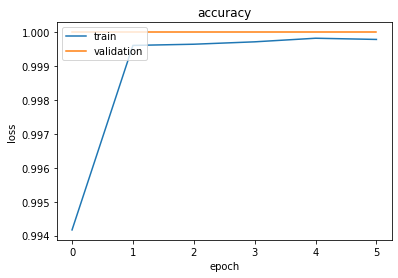

In [68]:
#Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [69]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

983/983 [==============================] - 38s 39ms/step - loss: 4.1692e-08 - accuracy: 1.0000
Accuracy of the model on Training Data is -  100.0 %
421/421 [==============================] - 16s 38ms/step - loss: 3.8145e-08 - accuracy: 1.0000
Accuracy of the model on Testing Data is -  100.0 %


In [70]:
test_pred = (model.predict(X_test) > 0.5).astype("int32")
test_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

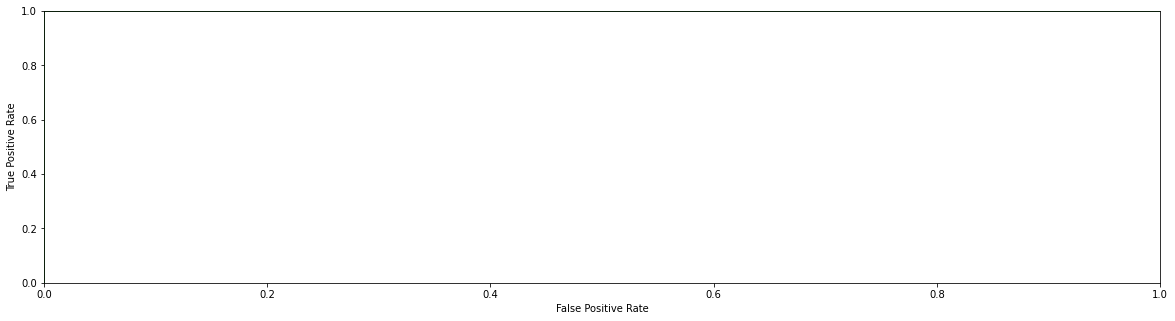

In [73]:
def plot_roc_curve(fpr,tpr): 
    plt.figure(figsize = (20,5))
    plt.plot(fpr,tpr, color = 'green') 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    

fpr , tpr , thresholds = roc_curve (y_test , test_pred)
plot_roc_curve(fpr,tpr)

In [74]:
print(classification_report(y_test, test_pred, target_names = ['Fake news','Real news']))

              precision    recall  f1-score   support

   Fake news       1.00      1.00      1.00      7044
   Real news       1.00      1.00      1.00      6425

    accuracy                           1.00     13469
   macro avg       1.00      1.00      1.00     13469
weighted avg       1.00      1.00      1.00     13469



In [78]:
confusion_matrix(y_test,test_pred)

array([[7044,    0],
       [   0, 6425]])

In [79]:
cmatrix = confusion_matrix(y_test,test_pred)
cmatrix = pd.DataFrame(cmatrix , index = ['Fake news','real news'] , columns = ['Fake news','real news'])

Text(42.0, 0.5, 'Actual')

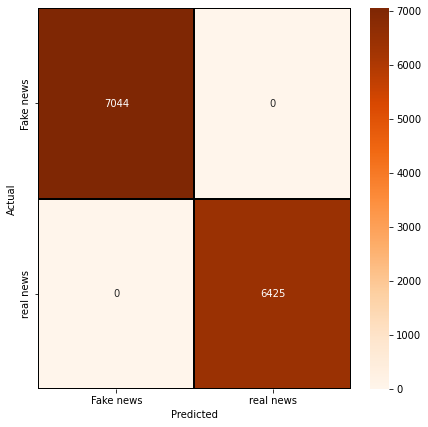

In [80]:
plt.figure(figsize = (7,7))
sns.heatmap(cmatrix,cmap= "Oranges", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake news','real news'] , yticklabels = ['Fake news','real news'])
plt.xlabel("Predicted")
plt.ylabel("Actual")